In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
import seaborn as sns
from PIL import Image, ImageOps
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

In [3]:
from tqdm import tqdm

files = os.listdir('UTKFace')

In [4]:
import cv2

In [5]:
images = []
ages = []
genders = []

for i in tqdm(files):
    split = i.split('_')
    ages.append(np.array(int(split[0])))
    genders.append(np.array(int(split[1])))
    p = 'UTKFace'+'/'+i
    img = cv2.imread(p)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    images.append(np.array(img))

100%|██████████████████████████████████████████████████████████████████████████| 23604/23604 [00:16<00:00, 1473.17it/s]


14
0


(200, 200, 3)

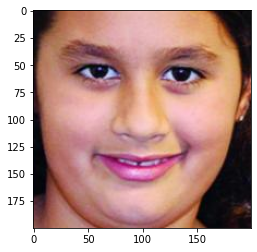

In [82]:
import matplotlib.pyplot as plt
print(ages[500])
print(genders[500])
plt.imshow(images[1000])
images[1000].shape

In [7]:
age = np.array(ages,dtype=np.int64)
images = np.array(images)
gender = np.array(genders,np.uint64)

### Split data into testing and training

In [8]:
x_train_age, x_test_age,y_train_age,y_test_age = train_test_split(images,age,random_state=42)
x_train_gender,x_test_gender,y_train_gender,y_test_gender = train_test_split(images,gender,random_state=42)

### Defining Model for Age  Using Swish Activation Function

In [9]:
agemodel = Sequential()
agemodel.add(Conv2D(32, (3,3), activation='swish', input_shape=(200, 200, 3)))
agemodel.add(MaxPooling2D((2,2)))
agemodel.add(Conv2D(64, (3,3), activation='swish'))
agemodel.add(MaxPooling2D((2,2)))
agemodel.add(Conv2D(128, (3,3), activation='swish'))
agemodel.add(MaxPooling2D((2,2)))
agemodel.add(Flatten())
agemodel.add(Dense(64, activation='swish'))
agemodel.add(Dropout(0.5))
agemodel.add(Dense(1, activation='swish'))

agemodel.compile(loss='mean_squared_error',optimizer='Adam',metrics=['mae'])

In [10]:
agemodel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 23, 23, 128)      0

In [11]:
datagen = ImageDataGenerator(rescale=1./255., width_shift_range = 0.1, height_shift_range = 0.1, horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale=1./255)

train1 = datagen.flow(x_train_age, y_train_age, batch_size=32)

test1 = test_datagen.flow(x_test_age, y_test_age,batch_size=32)

In [12]:
history1 = agemodel.fit(train1, epochs=50, shuffle=True, validation_data=test1)

Epoch 1/50
554/554 [==============================] - 530s 953ms/step - loss: 363.0194 - mae: 14.6795 - val_loss: 246.1127 - val_mae: 11.8007
Epoch 2/50
554/554 [==============================] - 510s 920ms/step - loss: 297.1532 - mae: 13.2717 - val_loss: 204.1370 - val_mae: 11.2442
Epoch 3/50
554/554 [==============================] - 505s 912ms/step - loss: 266.5156 - mae: 12.5596 - val_loss: 178.2185 - val_mae: 10.1137
Epoch 4/50
554/554 [==============================] - 530s 956ms/step - loss: 249.3980 - mae: 12.0401 - val_loss: 157.5413 - val_mae: 9.4877
Epoch 5/50
554/554 [==============================] - 511s 922ms/step - loss: 237.7559 - mae: 11.7092 - val_loss: 196.0881 - val_mae: 10.1469
Epoch 6/50
554/554 [==============================] - 501s 904ms/step - loss: 225.7817 - mae: 11.3356 - val_loss: 144.6923 - val_mae: 8.8554
Epoch 7/50
554/554 [==============================] - 490s 884ms/step - loss: 216.2826 - mae: 11.0961 - val_loss: 145.8799 - val_mae: 8.9628
Epoch 8/5

In [13]:
agemodel.save('agemodel_swish.h5')

In [52]:
img = cv2.imread('alyson.jpg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img = np.array(img)

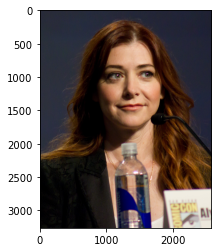

In [53]:
plt.imshow(img)

In [54]:
img = cv2.resize(img,(200,200))

In [55]:
img = img/255

In [56]:
img = img.reshape(-1, 200, 200, 3)

In [57]:
age = agemodel.predict(img)
age

array([[56.088516]], dtype=float32)

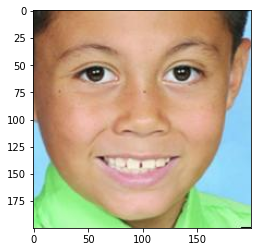

In [76]:
plt.imshow(images[500])

In [79]:
i = images[500]
i = i/255
i.shape

(200, 200, 3)

In [81]:
i = i.reshape(-1, 200, 200, 3)
import math
math.floor(agemodel.predict(i)[0][0])

10

Age: 33


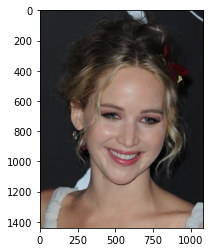

In [61]:
img = cv2.imread('jennifer.jpg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img = np.array(img)
plt.imshow(img)
img = cv2.resize(img,(200,200))
img = img/255
img = img.reshape(-1, 200, 200, 3)
age = agemodel.predict(img)
print("Age:",math.floor(age))

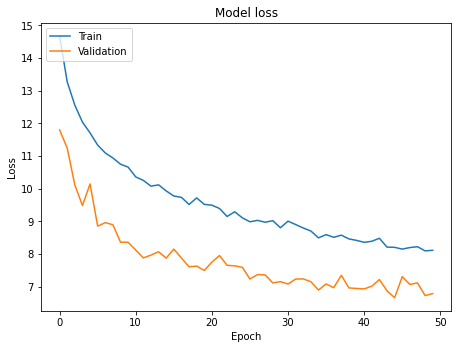

In [64]:
plt.plot(history1.history['mae'])
plt.plot(history1.history['val_mae'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.subplots_adjust(top=1.00, bottom=0.0, left=0.0, right=0.95, hspace=0.25,wspace=0.35)

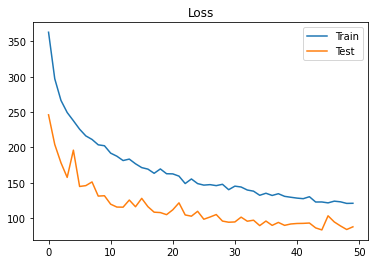

In [67]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Loss')
plt.legend(['Train','Test'])
plt.show()

In [93]:
from keras.utils.vis_utils import plot_model
tf.keras.utils.plot_model(
agemodel, to_file='model.png', show_shapes=False, show_dtype=False,
show_layer_names=True, rankdir='TB', expand_nested=False, dpi=96
)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.
